# AgBr speciation plot

In [4]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt; rootpath=txt(1:n-16);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% clear data and number format
clear; format short e
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 
%graphics_toolkit("gnuplot");
%available_graphics_toolkits()
%loaded_graphics_toolkits()

In [5]:
%equilibrium problem
AgT=1e-10; pH=7;  pe=20.75-pH; logBrT=-9:0.02:-1; BrT=10.^logBrT;

In [6]:
% MODEL USING PHREEQC

for i=1:length(BrT)

minerals=[{'AgBrs'}]; totalvector=[AgT; BrT(i); BrT(i)]; totalnames=[{'Ag'}; {'Br'}; {'Na'}]; 
speciesexport=[{'Ag+'}; {'Br-'};{'AgBr'};{'AgBr2-'};{'AgBr3-2'};{'AgBr4-3'}];
%database=['llnl_nosolubleAgCl.dat']; 
acid=['NaOH']; show=1; T=25;
%database=['AgCl.dat']; 
database=['complexAgBr.dat']; 

tic
[solutionspeciesconcs, speciesnames, solidconcs, solidnames]=runPHREEQCv2noHA(T,pH,pe,totalnames,totalvector,minerals,speciesexport,database,show,acid);
PHREEQCtime=toc;

Ag(i)=solutionspeciesconcs(1); 
Br(i)=solutionspeciesconcs(2); 
AgBr(i)=solutionspeciesconcs(3); 
AgBr2(i)=solutionspeciesconcs(4);
AgBr3(i)=solutionspeciesconcs(5);
AgBr4(i)=solutionspeciesconcs(6);
AgBrs(i)=solidconcs(1);

end

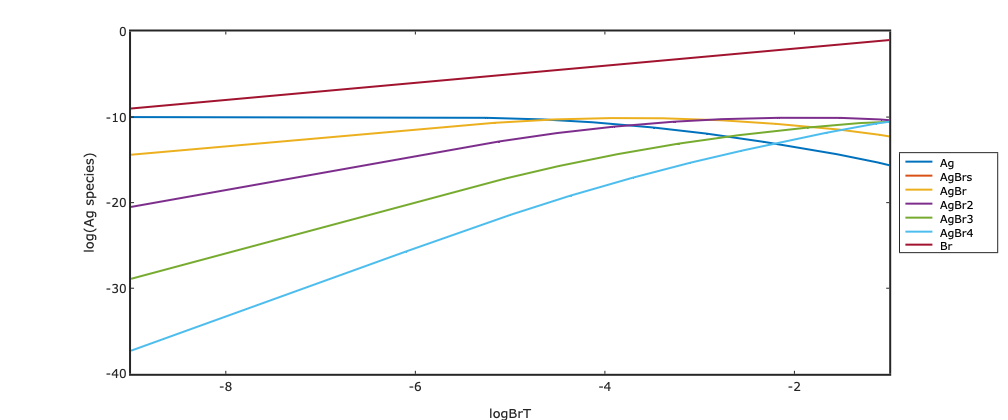

In [7]:
h=plot(logBrT,log10(Ag),logBrT,log10(AgBrs),logBrT,log10(AgBr),logBrT,log10(AgBr2),logBrT,log10(AgBr3),logBrT,log10(AgBr4),logBrT,log10(Br));
set(h,'linewidth',2)
set(gca,'linewidth',2,'fontsize',12)
xlabel('logBrT'); ylabel('log(Ag species)')
legend('Ag','AgBrs','AgBr','AgBr2','AgBr3','AgBr4','Br','location','eastoutside')
axis([-9 -1 -40 0])
%exportforplot=[...
%logBrT' log10(Ag)' log10(AgBrs)' log10(AgBr)' log10(AgBr2)' log10(AgBr3)' log10(AgBr4)'
%]